# **July 12th 2023**
Data Cleansing
Amount of dat = 248580
1. Timecount (_time) = 62
2. field = 30
3. Data each field = 8286
4. Another column:
```
Viavi_Cell_id = 13
Viavi_Nb1_id = 17
Viavi_Nb2_id = 19
Viavi_QoS_CellId = 10
Viavi_QoS_DrbId = 1
Viavi_QoS_SliceId = 2
Viavi_QoS_UeRnti = 20
Viavi_Slice_id = 2
Viavi_UE_BeamId = 1
Viavi_UE_id = 20
```

Additional Information: [DataPrep](https://hackmd.io/@o-cEaz3zThyRe36wA-WGEQ/rkXbc12t2)

## **Import Data**

In [ ]:
from google.colab import drive
import pandas as pd
import datetime
import numpy as np


## **Connect to google drive**

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import local data csv and drop some column also list the feature, time, and column**

In [ ]:
df_ue = pd.read_csv('drive/MyDrive/NTUST BWM LAB/uedata.csv')
df_ue.reset_index(drop=True, inplace=True)
df_ue.drop(['table','_measurement','_start','_stop'], axis=1, inplace=True)
unique_field = df_ue['_field'].unique()
unique_timeseries = sorted(df_ue['_time'].unique())
column_listed = list(df_ue.columns)
# df = pd.DataFrame({'a':[1,2,3,4,5,6],'b':['a','a','b','c','c','b']})
print(unique_field)
print(unique_timeseries)
print(column_listed)

['DRB_UECqiDl' 'DRB_UECqiUl' 'DRB_UEThpDl' 'DRB_UEThpUl'
 'QosFlow_TotPdcpPduVolumeDl' 'RRU_PrbUsedDl' 'RRU_PrbUsedUl'
 'TB_TotNbrDl' 'TB_TotNbrUl' 'Viavi_Geo_x' 'Viavi_Geo_y' 'Viavi_Geo_z'
 'Viavi_Nb1_RsSinr' 'Viavi_Nb1_Rsrp' 'Viavi_Nb1_Rsrq' 'Viavi_Nb2_RsSinr'
 'Viavi_Nb2_Rsrp' 'Viavi_Nb2_Rsrq' 'Viavi_QoS_5qi' 'Viavi_QoS_Gfbr'
 'Viavi_QoS_Mfbr' 'Viavi_QoS_Priority' 'Viavi_QoS_Score'
 'Viavi_QoS_TargetTput' 'Viavi_UE_RsSinr' 'Viavi_UE_Rsrp' 'Viavi_UE_Rsrq'
 'Viavi_UE_anomalies' 'Viavi_UE_targetThroughputDl'
 'Viavi_UE_targetThroughputUl']
['2023-07-07T03:30:00Z', '2023-07-07T04:00:00Z', '2023-07-07T04:30:00Z', '2023-07-07T05:00:00Z', '2023-07-07T05:30:00Z', '2023-07-07T06:00:00Z', '2023-07-07T06:30:00Z', '2023-07-07T07:00:00Z', '2023-07-07T07:30:00Z', '2023-07-07T08:00:00Z', '2023-07-07T08:30:00Z', '2023-07-07T09:00:00Z', '2023-07-07T09:30:00Z', '2023-07-07T10:00:00Z', '2023-07-07T10:30:00Z', '2023-07-07T11:00:00Z', '2023-07-07T11:30:00Z', '2023-07-07T12:00:00Z', '2023-07-07T12:30:00Z

## **Check the Feature Data**

Because [our data](https://hackmd.io/@o-cEaz3zThyRe36wA-WGEQ/r1ZGjxFYh) are in the field ("_field") column, so change the data view into the field.

In [ ]:
field_idb = df_ue.groupby('_field')
field_idb.first()

,_time,_value,Viavi_Cell_id,Viavi_Nb1_id,Viavi_Nb2_id,Viavi_QoS_CellId,Viavi_QoS_DrbId,Viavi_QoS_SliceId,Viavi_QoS_UeRnti,Viavi_Slice_id,Viavi_UE_BeamId,Viavi_UE_id
_field,,,,,,,,,,,,
DRB_UECqiDl,2023-07-07T04:00:00Z,0.000000,10,10,6,16,1,2,18,2,0,18
DRB_UECqiUl,2023-07-07T04:00:00Z,0.000000,10,10,6,16,1,2,18,2,0,18
DRB_UEThpDl,2023-07-07T04:00:00Z,0.027000,10,10,6,16,1,2,18,2,0,18
DRB_UEThpUl,2023-07-07T04:00:00Z,0.027000,10,10,6,16,1,2,18,2,0,18
QosFlow_TotPdcpPduVolumeDl,2023-07-07T04:00:00Z,27.000000,10,10,6,16,1,2,18,2,0,18
RRU_PrbUsedDl,2023-07-07T04:00:00Z,75.000000,10,10,6,16,1,2,18,2,0,18
RRU_PrbUsedUl,2023-07-07T04:00:00Z,75.000000,10,10,6,16,1,2,18,2,0,18
TB_TotNbrDl,2023-07-07T04:00:00Z,0.000000,10,10,6,16,1,2,18,2,0,18
TB_TotNbrUl,2023-07-07T04:00:00Z,0.000000,10,10,6,16,1,2,18,2,0,18


## **Take a look into timeseries data**

This procedure goals is for trace the timestamp of getting data from influxDB. The trace are looking into

In [ ]:
df_new_dict = dict()

for i in range(len(unique_field)):
  df_new_dict[unique_field[i]] = field_idb.get_group(unique_field[i])
  df_new_dict[unique_field[i]].reset_index(drop=True, inplace=True)

# df_ue.pivot_table(index = ['_time'], aggfunc ='size')

In [ ]:
df_new_dict[unique_field[0]].loc[df_new_dict[unique_field[0]]['_time'] == unique_timeseries[0]]

,_time,_value,Viavi_Cell_id,Viavi_Nb1_id,Viavi_Nb2_id,Viavi_QoS_CellId,Viavi_QoS_DrbId,Viavi_QoS_SliceId,Viavi_QoS_UeRnti,Viavi_Slice_id,Viavi_UE_BeamId,Viavi_UE_id,_field
46,2023-07-07T03:30:00Z,0.0,10,13,17,10,1,2,17,2,0,17,DRB_UECqiDl
82,2023-07-07T03:30:00Z,0.0,10,13,9,10,1,2,17,2,0,17,DRB_UECqiDl
204,2023-07-07T03:30:00Z,0.0,11,11,12,15,1,2,11,2,0,11,DRB_UECqiDl
232,2023-07-07T03:30:00Z,0.0,11,11,12,8,1,2,20,2,0,20,DRB_UECqiDl
290,2023-07-07T03:30:00Z,0.0,11,12,14,15,1,2,11,2,0,11,DRB_UECqiDl
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,2023-07-07T03:30:00Z,0.0,9,6,13,10,1,2,17,2,0,17,DRB_UECqiDl
8037,2023-07-07T03:30:00Z,0.0,9,8,13,15,1,2,15,2,0,15,DRB_UECqiDl
8075,2023-07-07T03:30:00Z,0.0,9,8,4,15,1,2,15,2,0,15,DRB_UECqiDl
8148,2023-07-07T03:30:00Z,0.0,9,9,10,10,1,2,17,2,0,17,DRB_UECqiDl


In [ ]:
np.array(df_new_dict[unique_field[0]].loc[df_new_dict[unique_field[0]]['_time'] == unique_timeseries[0]][column_listed[2]])

array([10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9])

In [ ]:
np.array(df_new_dict[unique_field[1]].loc[df_new_dict[unique_field[1]]['_time'] == unique_timeseries[0]][column_listed[2]])

array([10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9])

In [ ]:
np.array(df_new_dict[unique_field[2]].loc[df_new_dict[unique_field[2]]['_time'] == unique_timeseries[0]][column_listed[2]])

array([10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14,
       14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16,
       16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9])

In [ ]:
for j in range(len(unique_field)):
  print(df_new_dict[unique_field[i]].loc[df_new_dict[unique_field[i]]['_time'] == unique_timeseries[0]])

                     _time  _value  Viavi_Cell_id  Viavi_Nb1_id  Viavi_Nb2_id  \
46    2023-07-07T03:30:00Z     0.3             10            13            17   
82    2023-07-07T03:30:00Z     0.3             10            13             9   
204   2023-07-07T03:30:00Z     0.3             11            11            12   
232   2023-07-07T03:30:00Z     0.3             11            11            12   
290   2023-07-07T03:30:00Z     0.3             11            12            14   
...                    ...     ...            ...           ...           ...   
7915  2023-07-07T03:30:00Z     0.3              9             6            13   
8037  2023-07-07T03:30:00Z     0.3              9             8            13   
8075  2023-07-07T03:30:00Z     0.3              9             8             4   
8148  2023-07-07T03:30:00Z     0.3              9             9            10   
8249  2023-07-07T03:30:00Z     0.3              9             9             8   

      Viavi_QoS_CellId  Via

# **July 13th 2023**
Data Cleansing

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## **Correlation Matrix**
Here want to know the correlation data in the ID, because the previous cleansing data proven that at the same time here's a lot of data but in different UE. Due to that, we see the ID correlation

In [ ]:
df_ue.corr()

<ipython-input-12-e7fd99b3c087>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_ue.corr()


,_value,Viavi_Cell_id,Viavi_Nb1_id,Viavi_Nb2_id,Viavi_QoS_CellId,Viavi_QoS_DrbId,Viavi_QoS_SliceId,Viavi_QoS_UeRnti,Viavi_Slice_id,Viavi_UE_BeamId,Viavi_UE_id
_value,1.000000,-0.098347,-0.079784,-0.071485,-0.063060,NaN,0.018872,0.038529,0.018872,NaN,0.038529
Viavi_Cell_id,-0.098347,1.000000,0.630985,0.519897,0.525420,NaN,-0.080150,-0.186537,-0.080150,NaN,-0.186537
Viavi_Nb1_id,-0.079784,0.630985,1.000000,0.229572,0.314868,NaN,-0.101258,-0.187354,-0.101258,NaN,-0.187354
Viavi_Nb2_id,-0.071485,0.519897,0.229572,1.000000,0.356866,NaN,-0.145412,-0.218866,-0.145412,NaN,-0.218866
Viavi_QoS_CellId,-0.063060,0.525420,0.314868,0.356866,1.000000,NaN,0.042165,-0.187721,0.042165,NaN,-0.187721
Viavi_QoS_DrbId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viavi_QoS_SliceId,0.018872,-0.080150,-0.101258,-0.145412,0.042165,NaN,1.000000,0.680622,1.000000,NaN,0.680622
Viavi_QoS_UeRnti,0.038529,-0.186537,-0.187354,-0.218866,-0.187721,NaN,0.680622,1.000000,0.680622,NaN,1.000000
Viavi_Slice_id,0.018872,-0.080150,-0.101258,-0.145412,0.042165,NaN,1.000000,0.680622,1.000000,NaN,0.680622
Viavi_UE_BeamId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-13-7e38c55864eb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_ue.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


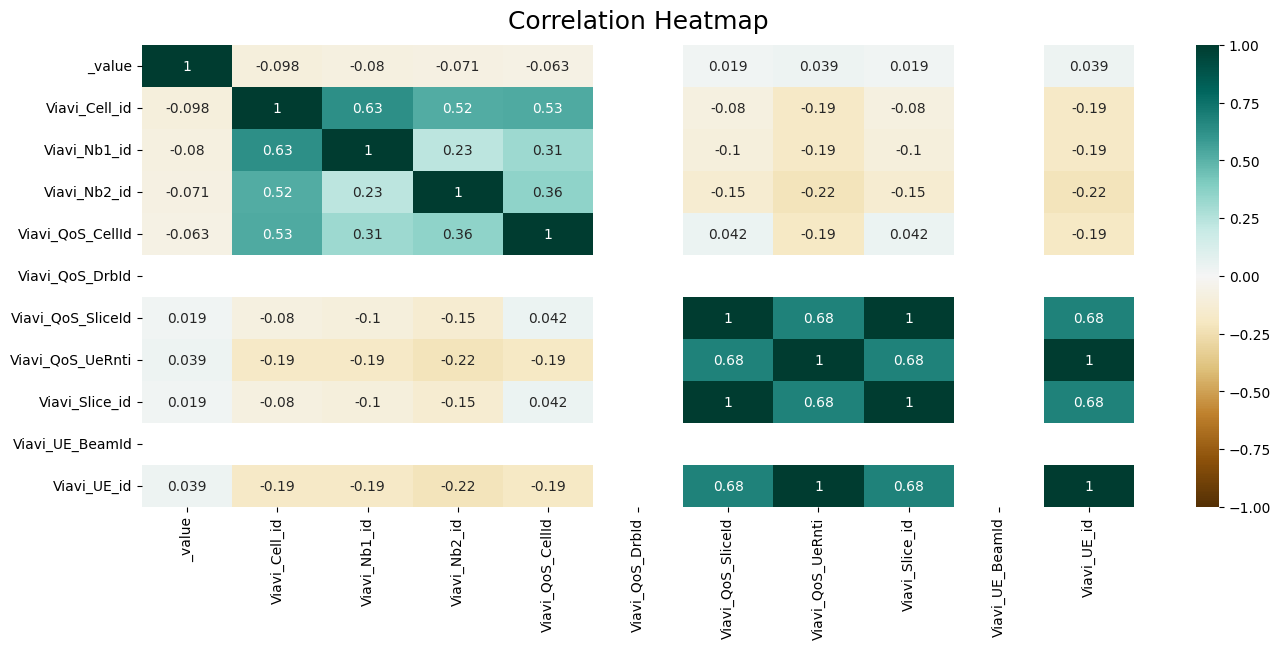

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_ue.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

As seen the figure above that any data with QoS is corellated each other, thus the those column are also dropped from our dataframe. The correlated data only make the model size bigger.

In [ ]:
column_listed

['_time',
 '_value',
 'Viavi_Cell_id',
 'Viavi_Nb1_id',
 'Viavi_Nb2_id',
 'Viavi_QoS_CellId',
 'Viavi_QoS_DrbId',
 'Viavi_QoS_SliceId',
 'Viavi_QoS_UeRnti',
 'Viavi_Slice_id',
 'Viavi_UE_BeamId',
 'Viavi_UE_id',
 '_field']

In [ ]:
for listed in range(5,11):
  df_ue.drop([column_listed[listed]], axis=1, inplace=True)

<ipython-input-16-cc9c39c1aae2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_ue.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')


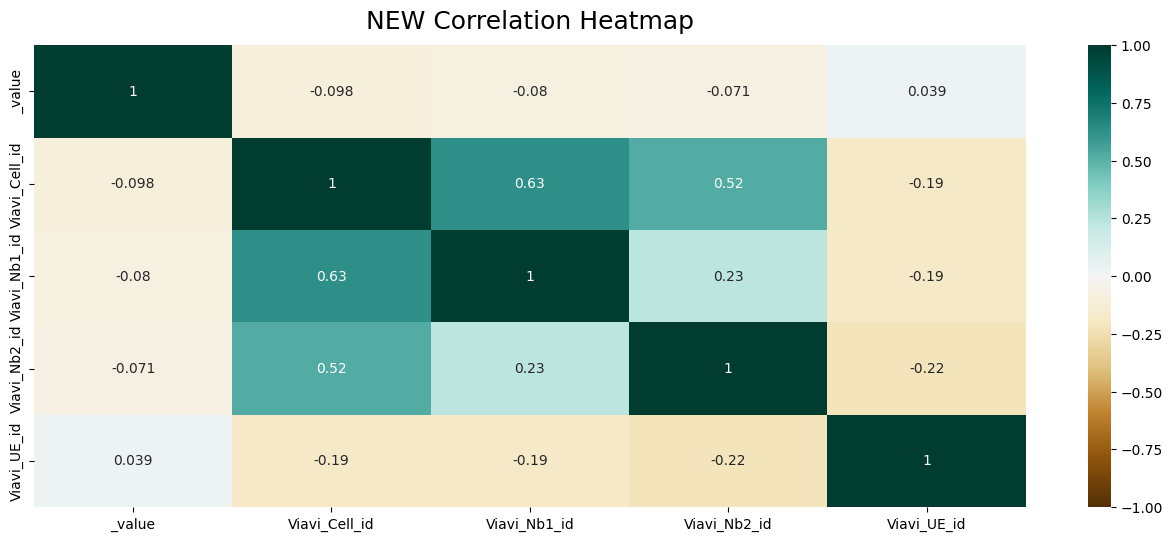

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_ue.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('NEW Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap_new.png', dpi=300, bbox_inches='tight')

In [ ]:
df_new = dict()

for i in range(len(unique_field)):
  df_new[unique_field[i]] = field_idb.get_group(unique_field[i])
  df_new[unique_field[i]].reset_index(drop=True, inplace=True)

In [ ]:
df_new[unique_field[0]]

,_time,_value,Viavi_Cell_id,Viavi_Nb1_id,Viavi_Nb2_id,Viavi_UE_id,_field
0,2023-07-07T04:00:00Z,0.0,10,10,6,18,DRB_UECqiDl
1,2023-07-07T05:30:00Z,0.0,10,10,6,18,DRB_UECqiDl
2,2023-07-07T07:00:00Z,0.0,10,10,6,18,DRB_UECqiDl
3,2023-07-07T08:30:00Z,0.0,10,10,6,18,DRB_UECqiDl
4,2023-07-07T10:30:00Z,0.0,10,10,6,18,DRB_UECqiDl
...,...,...,...,...,...,...,...
8281,2023-07-10T04:00:00Z,0.0,9,9,8,19,DRB_UECqiDl
8282,2023-07-10T05:30:00Z,0.0,9,9,8,19,DRB_UECqiDl
8283,2023-07-10T07:00:00Z,0.0,9,9,8,19,DRB_UECqiDl
8284,2023-07-10T08:30:00Z,0.0,9,9,8,19,DRB_UECqiDl


In [ ]:
dict_new_analytics = dict()

for i in range(len(unique_field)):
  dict_new_analytics[unique_field[i]] = list(field_idb.get_group(unique_field[i])["_value"])

df_new_analytics = pd.DataFrame(dict_new_analytics)

In [ ]:
df_new_analytics

,DRB_UECqiDl,DRB_UECqiUl,DRB_UEThpDl,DRB_UEThpUl,QosFlow_TotPdcpPduVolumeDl,RRU_PrbUsedDl,RRU_PrbUsedUl,TB_TotNbrDl,TB_TotNbrUl,Viavi_Geo_x,...,Viavi_QoS_Mfbr,Viavi_QoS_Priority,Viavi_QoS_Score,Viavi_QoS_TargetTput,Viavi_UE_RsSinr,Viavi_UE_Rsrp,Viavi_UE_Rsrq,Viavi_UE_anomalies,Viavi_UE_targetThroughputDl,Viavi_UE_targetThroughputUl
0,0.0,0.0,0.0270,0.0270,27.0,75.0,75.0,0.0,0.0,1464.0,...,0.0,20.0,9.0,0.2,42.639404,-79.589386,-10.792049,0.0,0.3,0.3
1,0.0,0.0,0.0135,0.0135,13.5,37.5,37.5,0.0,0.0,1467.0,...,0.0,20.0,4.0,0.2,42.639404,-79.589386,-10.792049,0.0,0.3,0.3
2,0.0,0.0,0.0135,0.0135,13.5,37.5,37.5,0.0,0.0,1467.0,...,0.0,20.0,4.0,0.2,42.639404,-79.589386,-10.792049,0.0,0.3,0.3
3,0.0,0.0,0.0135,0.0135,13.5,37.5,37.5,0.0,0.0,1467.0,...,0.0,20.0,4.0,0.2,42.639404,-79.589386,-10.792049,0.0,0.3,0.3
4,0.0,0.0,0.0270,0.0270,27.0,75.0,75.0,0.0,0.0,1464.0,...,0.0,20.0,9.0,0.2,42.639404,-79.589386,-10.792049,0.0,0.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,0.0,0.0,0.0135,0.0135,13.5,37.5,37.5,0.0,0.0,269.0,...,0.0,20.0,4.0,0.2,40.458809,-81.769981,-10.792203,0.0,0.3,0.3
8282,0.0,0.0,0.0135,0.0135,13.5,37.5,37.5,0.0,0.0,266.0,...,0.0,20.0,4.0,0.2,40.458809,-81.769981,-10.792203,0.0,0.3,0.3
8283,0.0,0.0,0.0270,0.0270,27.0,75.0,75.0,0.0,0.0,269.0,...,0.0,20.0,9.0,0.2,40.458809,-81.769981,-10.792203,0.0,0.3,0.3
8284,0.0,0.0,0.0270,0.0270,27.0,75.0,75.0,0.0,0.0,266.0,...,0.0,20.0,9.0,0.2,40.458809,-81.769981,-10.792203,0.0,0.3,0.3


In [ ]:
unique_field

array(['DRB_UECqiDl', 'DRB_UECqiUl', 'DRB_UEThpDl', 'DRB_UEThpUl',
       'QosFlow_TotPdcpPduVolumeDl', 'RRU_PrbUsedDl', 'RRU_PrbUsedUl',
       'TB_TotNbrDl', 'TB_TotNbrUl', 'Viavi_Geo_x', 'Viavi_Geo_y',
       'Viavi_Geo_z', 'Viavi_Nb1_RsSinr', 'Viavi_Nb1_Rsrp',
       'Viavi_Nb1_Rsrq', 'Viavi_Nb2_RsSinr', 'Viavi_Nb2_Rsrp',
       'Viavi_Nb2_Rsrq', 'Viavi_QoS_5qi', 'Viavi_QoS_Gfbr',
       'Viavi_QoS_Mfbr', 'Viavi_QoS_Priority', 'Viavi_QoS_Score',
       'Viavi_QoS_TargetTput', 'Viavi_UE_RsSinr', 'Viavi_UE_Rsrp',
       'Viavi_UE_Rsrq', 'Viavi_UE_anomalies',
       'Viavi_UE_targetThroughputDl', 'Viavi_UE_targetThroughputUl'],
      dtype=object)

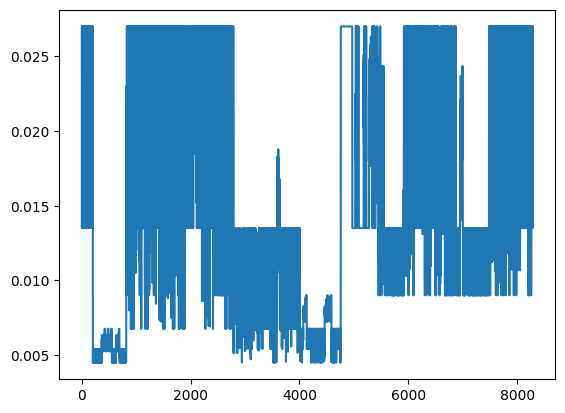

In [ ]:
plt.plot(df_new_analytics['DRB_UEThpDl'])

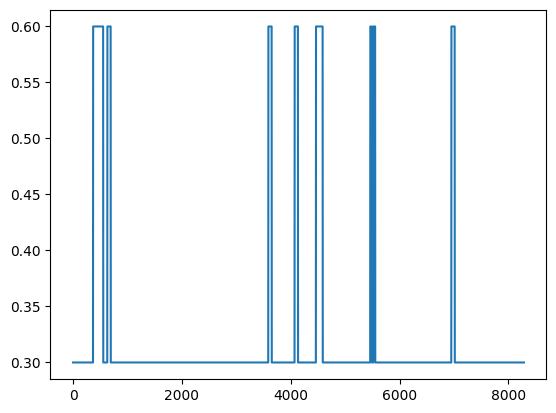

In [ ]:
plt.plot(df_new_analytics['Viavi_UE_targetThroughputDl'])

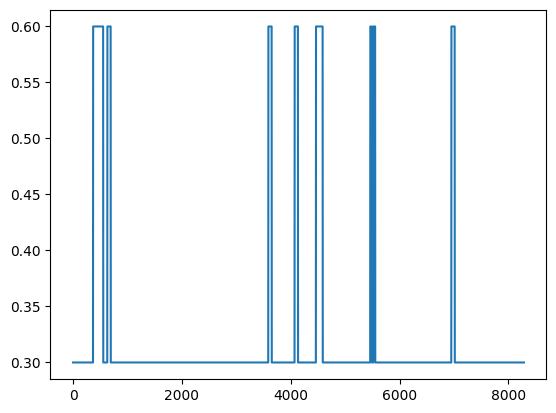

In [ ]:
plt.plot(df_new_analytics['Viavi_UE_targetThroughputUl'])

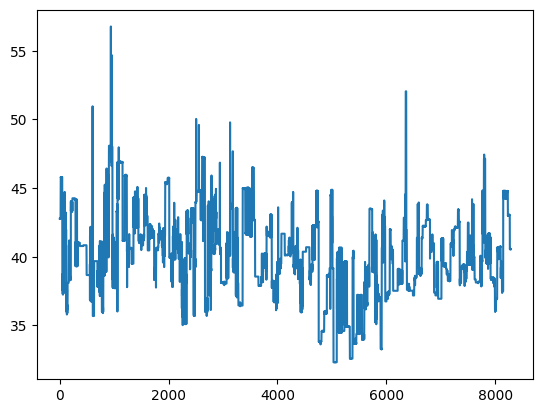

In [ ]:
plt.plot(df_new_analytics['Viavi_Nb1_RsSinr'])

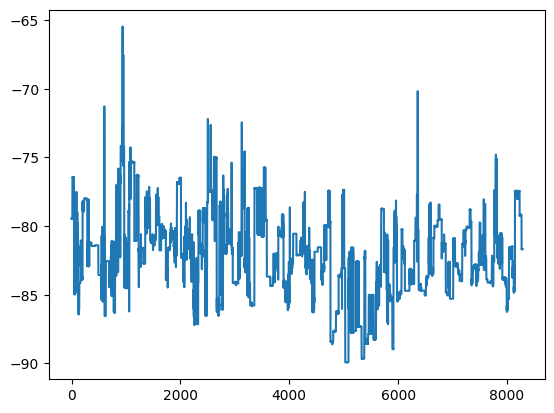

In [ ]:
plt.plot(df_new_analytics['Viavi_Nb1_Rsrp'])

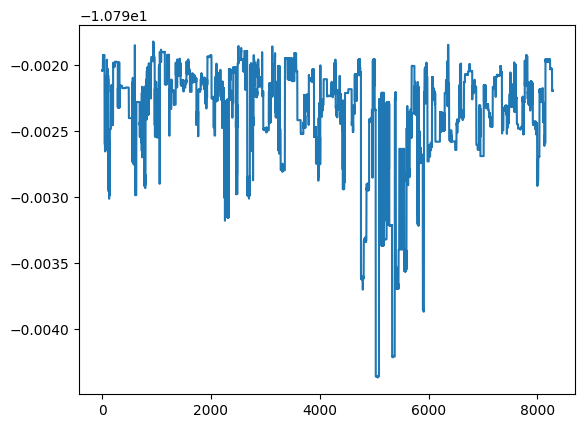

In [ ]:
plt.plot(df_new_analytics['Viavi_Nb1_Rsrq'])

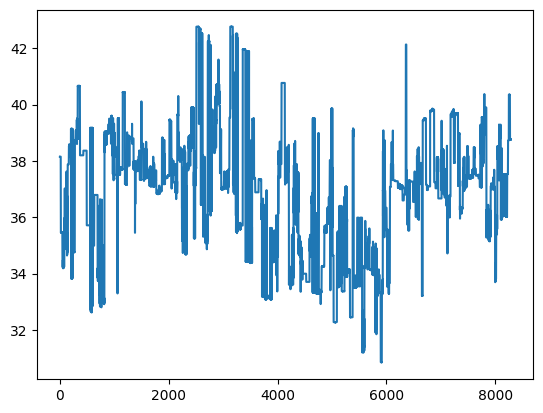

In [ ]:
plt.plot(df_new_analytics['Viavi_Nb2_RsSinr'])

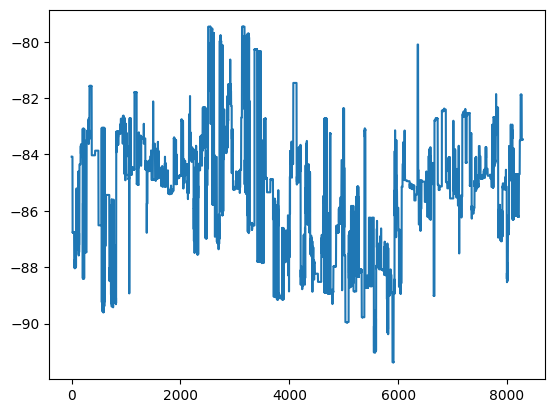

In [ ]:
plt.plot(df_new_analytics['Viavi_Nb2_Rsrp'])

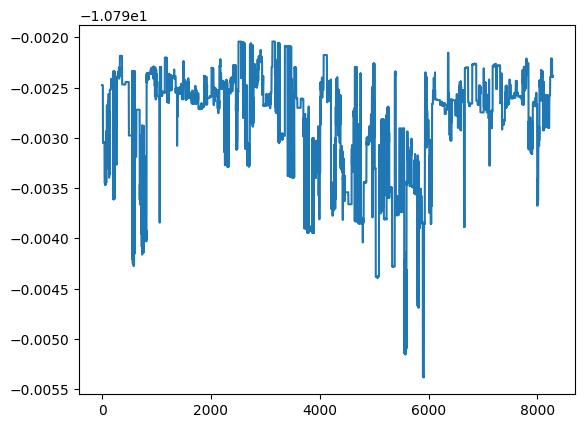

In [ ]:
plt.plot(df_new_analytics['Viavi_Nb2_Rsrq'])

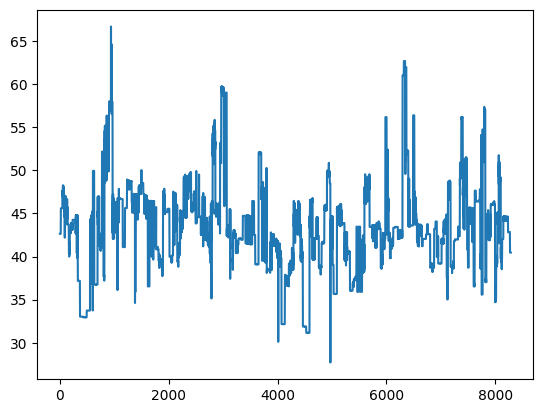

In [ ]:
plt.plot(df_new_analytics['Viavi_UE_RsSinr'])

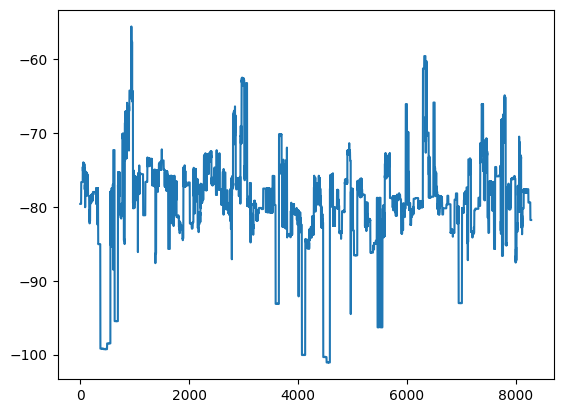

In [ ]:
plt.plot(df_new_analytics['Viavi_UE_Rsrp'])

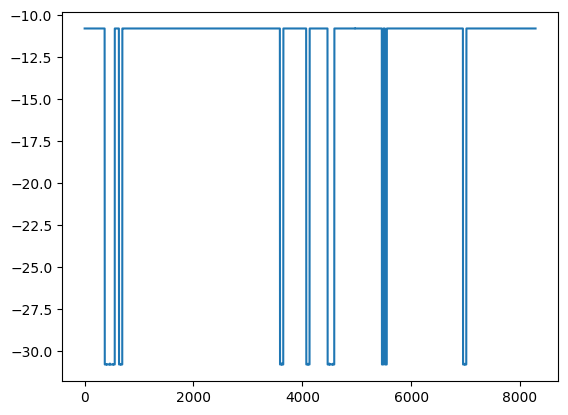

In [ ]:
plt.plot(df_new_analytics['Viavi_UE_Rsrq'])

In [ ]:
df_new_analytics.corr()

,DRB_UECqiDl,DRB_UECqiUl,DRB_UEThpDl,DRB_UEThpUl,QosFlow_TotPdcpPduVolumeDl,RRU_PrbUsedDl,RRU_PrbUsedUl,TB_TotNbrDl,TB_TotNbrUl,Viavi_Geo_x,...,Viavi_QoS_Mfbr,Viavi_QoS_Priority,Viavi_QoS_Score,Viavi_QoS_TargetTput,Viavi_UE_RsSinr,Viavi_UE_Rsrp,Viavi_UE_Rsrq,Viavi_UE_anomalies,Viavi_UE_targetThroughputDl,Viavi_UE_targetThroughputUl
DRB_UECqiDl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRB_UECqiUl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DRB_UEThpDl,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.183661,...,NaN,-0.208078,0.978770,-0.208078,0.158056,0.199297,0.208080,NaN,-0.208078,-0.208078
DRB_UEThpUl,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.183661,...,NaN,-0.208078,0.978770,-0.208078,0.158056,0.199297,0.208080,NaN,-0.208078,-0.208078
QosFlow_TotPdcpPduVolumeDl,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.183661,...,NaN,-0.208078,0.978770,-0.208078,0.158056,0.199297,0.208080,NaN,-0.208078,-0.208078
RRU_PrbUsedDl,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.183661,...,NaN,-0.208078,0.978770,-0.208078,0.158056,0.199297,0.208080,NaN,-0.208078,-0.208078
RRU_PrbUsedUl,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,0.183661,...,NaN,-0.208078,0.978770,-0.208078,0.158056,0.199297,0.208080,NaN,-0.208078,-0.208078
TB_TotNbrDl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TB_TotNbrUl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Viavi_Geo_x,NaN,NaN,0.183661,0.183661,0.183661,0.183661,0.183661,NaN,NaN,1.000000,...,NaN,-0.047085,0.160393,-0.047085,-0.084036,-0.045758,0.047085,NaN,-0.047085,-0.047085


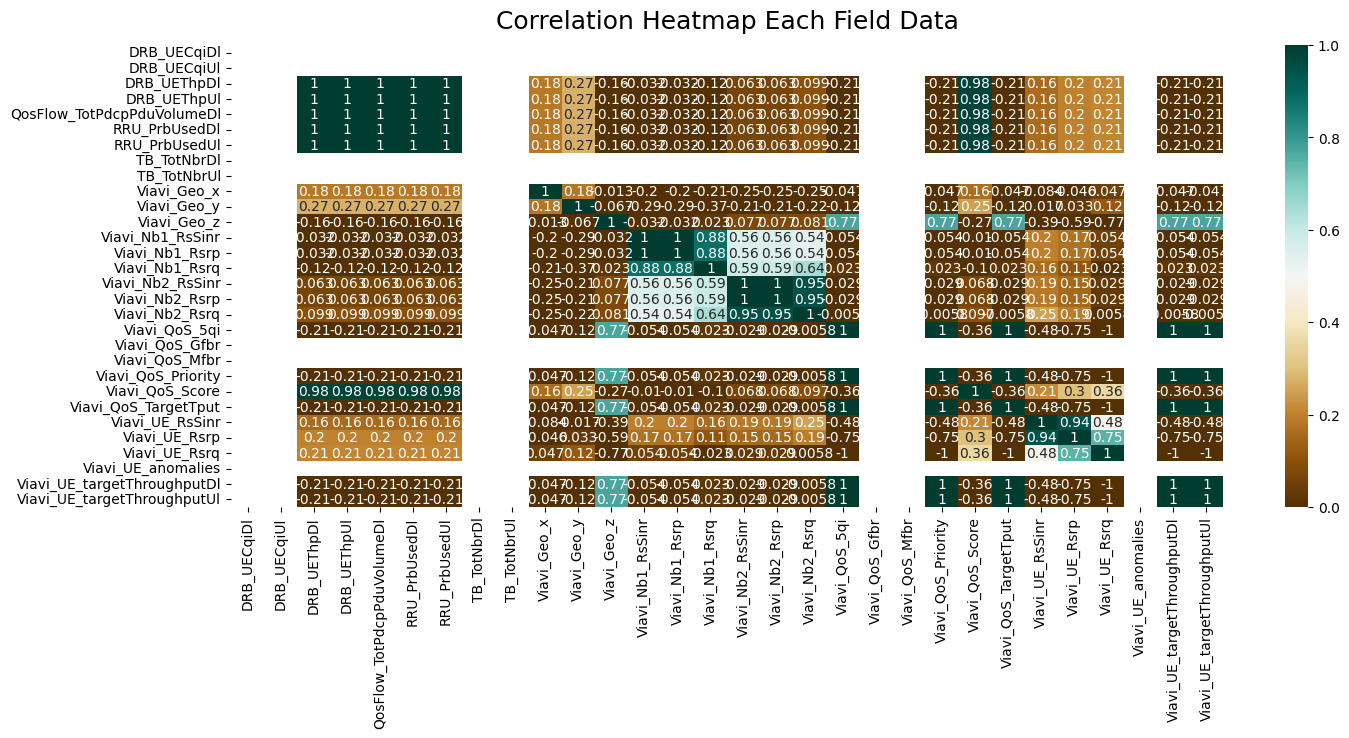

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_new_analytics.corr(), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap Each Field Data', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap_new_field.png', dpi=300, bbox_inches='tight')

In [ ]:
def drop_high_correlation_columns(df, threshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    columns_to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df.drop(columns=columns_to_drop, inplace=True)
    return df

threshold = 0.95
df_new_analytics = drop_high_correlation_columns(df_new_analytics, threshold)
df_new_analytics = df_new_analytics.drop(["DRB_UECqiDl","DRB_UECqiUl","TB_TotNbrDl","TB_TotNbrUl","Viavi_QoS_Gfbr","Viavi_QoS_Mfbr","Viavi_Geo_x","Viavi_Geo_y","Viavi_Geo_z"],axis=1)

In [ ]:
df_new_analytics

,DRB_UEThpDl,Viavi_Nb1_RsSinr,Viavi_Nb1_Rsrq,Viavi_Nb2_RsSinr,Viavi_Nb2_Rsrq,Viavi_QoS_5qi,Viavi_UE_RsSinr,Viavi_UE_Rsrp,Viavi_UE_anomalies
0,0.0270,42.777626,-10.792042,38.152004,-10.792477,1.0,42.639404,-79.589386,0.0
1,0.0135,42.823997,-10.792039,38.150402,-10.792478,1.0,42.639404,-79.589386,0.0
2,0.0135,42.823997,-10.792039,38.150402,-10.792478,1.0,42.639404,-79.589386,0.0
3,0.0135,42.823997,-10.792039,38.150402,-10.792478,1.0,42.639404,-79.589386,0.0
4,0.0270,42.777626,-10.792042,38.152004,-10.792477,1.0,42.639404,-79.589386,0.0
...,...,...,...,...,...,...,...,...,...
8281,0.0135,40.574848,-10.792192,38.751385,-10.792392,1.0,40.458809,-81.769981,0.0
8282,0.0135,40.545856,-10.792195,38.767941,-10.792389,1.0,40.458809,-81.769981,0.0
8283,0.0270,40.574848,-10.792192,38.751385,-10.792392,1.0,40.458809,-81.769981,0.0
8284,0.0270,40.545856,-10.792195,38.767941,-10.792389,1.0,40.458809,-81.769981,0.0


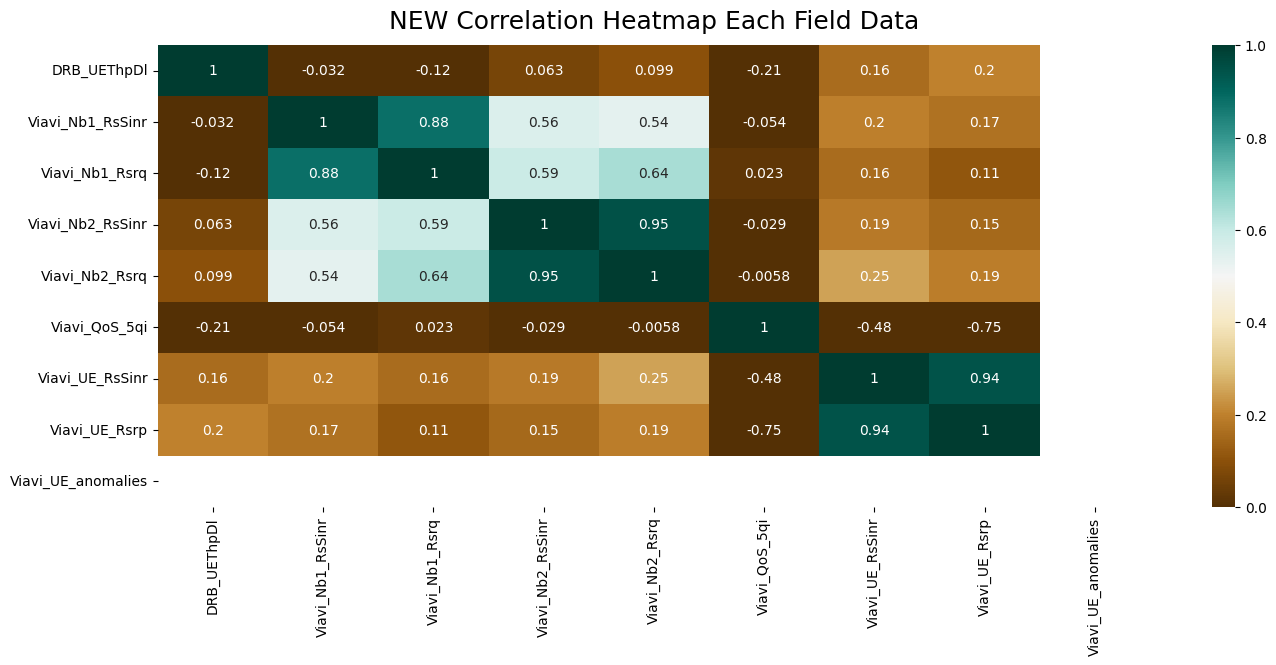

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_new_analytics.corr(), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('NEW Correlation Heatmap Each Field Data', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap_new_fieldNEW.png', dpi=300, bbox_inches='tight')